In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

In [2]:
import gp_lens
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
default_color_list = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
peaks = gp_lens.LensingPSorPeaks(-0.02, 0.06, 'K', redshifts=('10',), observable_name='Peaks', bin_center_row=0)
x, y = peaks.get_realizations(model_index=1, verbose=True)
peaks.fid = np.mean(y,axis=0)

powerspec = gp_lens.LensingPSorPeaks(300,3000, 'K', redshifts=('10',), observable_name='PS', bin_center_row=0, binscale='log')
x, y = powerspec.get_realizations(model_index=0, verbose=True)
powerspec.fid = np.mean(y,axis=0)

/home/zequnl/Projects/neutrino_mpk/data/May_stats/Om0.29780_As2.10000_mva0.02175_mvb0.02338_mvc0.05486_h0.70000_Ode0.69995/Maps10/Peaks_K_s1.00_z1.00_ng13.25_b050.npy
/home/zequnl/Projects/neutrino_mpk/data/May_stats/Om0.29997_As2.10000_mva0.00000_mvb0.00000_mvc0.00000_h0.70000_Ode0.69995/box1/Maps10/PS_K_s1.00_z1.00_ng13.25_b050log.npy


In [4]:
class LensingPS_AND_Peaks(gp_lens.LensingPSorPeaks):
    def __init__(self, sky_coverage=1e4):
        """Initialize the parameters table and specifications."""
        # read in list of simulation cosmo parameters
        self.table = Table.read('parameters.table', format='ascii')
        
        # dictionary for getting the appropriate ng for a redshift
        self.ng_dict = {
            '05': '08.83',
            '10': '13.25',
            '15': '11.15',
            '20': '07.36',
            '25': '04.26',
            '10_ng40': '40.00'
        }
        self.sky_coverage = sky_coverage
        
        self.params = np.array([self.table['M_nu(eV)'],
                                self.table['Omega_m'],
                                self.table['10^9*A_s']])
        
    def get_realizations(self, model_index, covariance=False, verbose=False):
        x_peaks, y_peaks = peaks.get_realizations(model_index, covariance, verbose)
        x_ps, y_ps = powerspec.get_realizations(model_index, covariance, verbose)
        
        return np.hstack([x_ps, x_peaks]), np.hstack([y_ps, y_peaks])

In [5]:
combo = LensingPS_AND_Peaks()

In [14]:
x, y = combo.get_realizations(model_index=1, verbose=True)
combo.fid = np.mean(y,axis=0)

/home/zequnl/Projects/neutrino_mpk/data/May_stats/Om0.29780_As2.10000_mva0.02175_mvb0.02338_mvc0.05486_h0.70000_Ode0.69995/Maps10/Peaks_K_s1.00_z1.00_ng13.25_b050.npy
/home/zequnl/Projects/neutrino_mpk/data/May_stats/Om0.29780_As2.10000_mva0.02175_mvb0.02338_mvc0.05486_h0.70000_Ode0.69995/Maps10/PS_K_s1.00_z1.00_ng13.25_b050log.npy


/home/zequnl/Projects/neutrino_mpk/data/May_stats/Om0.29997_As2.10000_mva0.00000_mvb0.00000_mvc0.00000_h0.70000_Ode0.69995/box5/Maps10/Peaks_K_s1.00_z1.00_ng13.25_b050.npy
/home/zequnl/Projects/neutrino_mpk/data/May_stats/Om0.29997_As2.10000_mva0.00000_mvb0.00000_mvc0.00000_h0.70000_Ode0.69995/box5/Maps10/PS_K_s1.00_z1.00_ng13.25_b050log.npy
(9999, 38)
nr 9999 nb 38 bin 0.9960992198439688 sky 0.001225


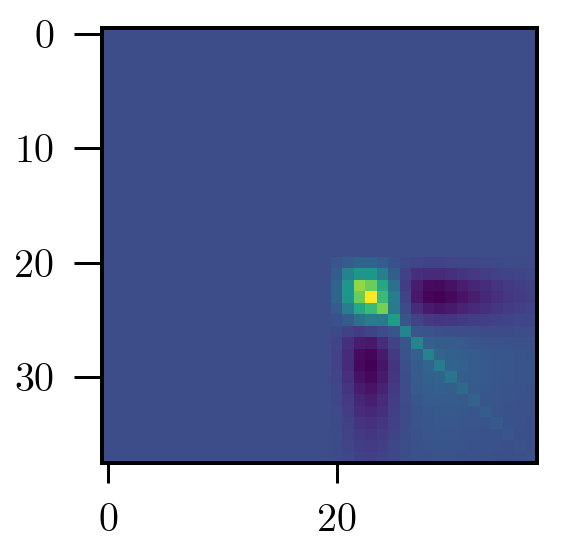

In [6]:
plt.imshow( np.linalg.inv(combo.compute_cov(0, verbose=True) ) )

In [7]:
index_list = np.arange(len(peaks.params.T))
index_list = np.delete(index_list, 0)
index_list = np.delete(index_list, 0)

modified_y = [combo.get_realizations(i) for i in index_list]
modified_X = (combo.params.T[index_list]).T

combo.fit(X=modified_X, real_list=modified_y)

/home/zequnl/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-2.91182718e-04,  4.76161317e-04, -8.77573220e-05,  1.51441599e-04]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 106, 'nit': 35, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/zequnl/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([ 0.00066905, -0.00066115, -0.00125765, -0.00161427]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 87, 'nit': 29, 'warnflag': 2}
  " state: %s" % convergence_dict)
/home/zequnl/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00011735,  0.00032909, -0.00033225,  0.00035315]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 69, 'nit': 17, '

/home/zequnl/Projects/neutrino_mpk/data/May_stats/Om0.29780_As2.10000_mva0.02175_mvb0.02338_mvc0.05486_h0.70000_Ode0.69995/Maps10/Peaks_K_s1.00_z1.00_ng13.25_b050.npy
/home/zequnl/Projects/neutrino_mpk/data/May_stats/Om0.29780_As2.10000_mva0.02175_mvb0.02338_mvc0.05486_h0.70000_Ode0.69995/Maps10/PS_K_s1.00_z1.00_ng13.25_b050log.npy
(9999, 38)


/home/zequnl/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


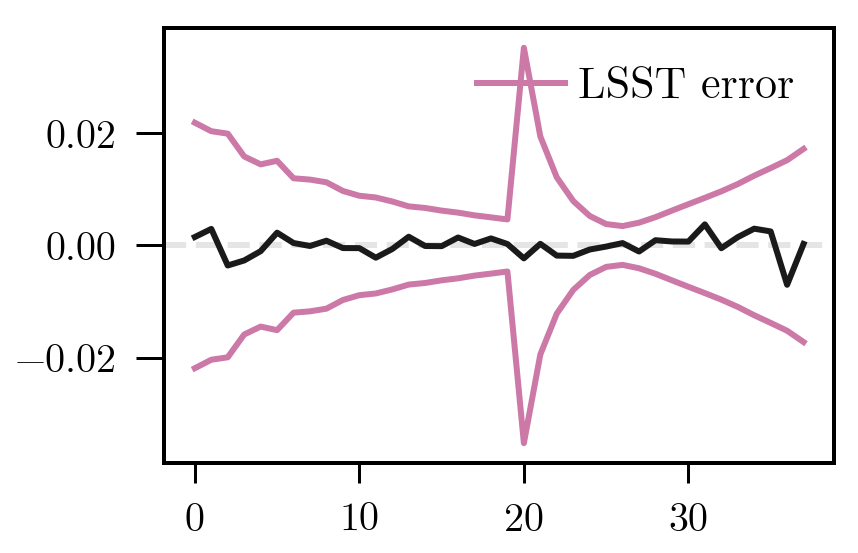

In [11]:
test_model = 1
x, y = combo.get_realizations(model_index=1, verbose=True)
y_true = np.mean(y, axis=0)

plt.axhline(0.0, color=(0,0,0,0.1), ls='dashed')

ys, sigs = combo.GP(combo.params.T[1])
# plt.fill_between( x, (sigs/y_true), (-sigs/y_true), color=default_color_list[3], alpha=0.2)

# plt.plot(ys)
plt.plot( (ys-y_true)/y_true, '-')

invcov = combo.compute_cov(0)
cov = np.linalg.inv(invcov)
plt.plot( np.sqrt(np.diag(cov))/y_true, label='LSST error', color=default_color_list[4] )
plt.plot( -np.sqrt(np.diag(cov))/y_true, color=default_color_list[4] )

plt.legend()
# plt.ylim(-0.02, 0.02)

In [17]:
combo.likelihood([0.1,0.3,2.1])

/home/zequnl/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


-0.8907121237341307